## Learning and finding

### Initial Exploring
- The first time I approached this problem, I performed some normal data cleaning and feature engineering and fitted 3 models(logistic regression, random forest, XGBoost), achieving 82% validation accuracy and 77% test accuracy.
- The key is focusing on handling missing data, building a streamlined workflow, and analyzing and processing various features.

### General findings
- **Interpretability VS Accuracy:** While improving prediction accuracy is useful, for a historically significant event like the Titanic, interpretability takes precedence over accuracy.
- **Workflow:** This beginner-level competition is designed to help us develop a foundational understanding and workflow for handling datasets, building upon the balance of interpretation and predictive modeling.
- **Testset:** Data cleaning and feature engineering should consider both the training and test sets. Use a **combine list of `train_df` and `test_df`** could help and reduce complexity.
- **Quick Validation:** New-created features could be quickly validated for their predictive utility.
- **Categorical Features:** For tree-based models, using integers (e.g., 1, 2, 3) for non-ordinal categorical features often does not cause significant issues(like introducing implict ordering). However, for most models, one-hot encoding could be better(just pay attention to avoiding feature sparsity and losing implicit relationships).

### Other
- The notebook [Titanic Data Science Solutions](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/) provided valuable insights into data science workflows and in-depth analysis of each predictor. I learned a lot from this notebook.

## 1. Data Loading

In [53]:
# import pandas as pd
# # This is a good practice to reduce feature processing complexity.
# train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
# test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
# combine = [train_df, test_df]

# train_df.head()

In [54]:
# read files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the data
# df = pd.read_csv('titanic/train.csv')

# on kaggle
df = pd.read_csv('/kaggle/input/titanic/train.csv')


print(df.info())
print(df.columns)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Cleaning

### 2.1 Missing Values

In [55]:
# check missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Age Imputation Methods

1. **Impute with Mean or Median**  
   - Simplest approach but may introduce noise.

2. **Impute Based on Categories (e.g., `Pclass`, `Gender`, `SibSp`, `Parch`, and `Fare`) with Fallbacks**  
   - Reduces noise by incorporating multiple grouping features for finer imputation.  
   - If some groups lack samples, broader categories (e.g., `Pclass` and `Gender`) are used as a fallback, ensuring no missing values remain.  
   - This method balances precision and simplicity.

3. **Use a Regression Model to Predict Missing Ages**  
   - Most accurate method but significantly more complex and computationally intensive.  
   - Requires consistent preprocessing across training and test sets.

---

### Selected Method
I preferred the third method for its accuracy, but due to its complexity, I opted for the second method as a simpler alternative.

In [56]:
# Fill missing 'Age' values in the training set
df['Age'] = df['Age'].fillna(
    df.groupby(['Pclass', 'Sex',  "SibSp", "Parch", "Fare"])['Age'].transform('mean')
)
df['Age'] = df['Age'].fillna(
    df.groupby(['Pclass', 'Sex'])['Age'].transform('mean')
)
global_mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(global_mean_age)

In [57]:
# # check age distribution
# sns.histplot(df["Age"])
# plt.show()

- **Embarked**: Impute with the mode, as it has minimal missing data (2 in training and a few in the test set) and low predictive importance.
- **Cabin**: Just impute the missing data with 'Unknown', as we may drop this column later.

In [58]:
# fill the missing values in the Embarked column with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# fill the missing values in the Cabin column with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [59]:
# check missing values again
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 2.2 Outliers
- Standard workflow. Not applicable for this dataset.

In [60]:
# # check outliers with boxplot
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.boxplot(x=df['Fare'])
# plt.show()

### 2.3 Check Duplicates and Data Types
- Standard workflow. Not applicable for this dataset.

## 3. Exploratory Data Analysis

- For this part, I recommend reading the notebook [Titanic Data Science Solutions](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/). It provides an in-depth analysis of each predictor. Personally, I follow a simpler approach with basic steps.

In [61]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.761046    0.523008   
std     257.353842    0.486592    0.836071   13.487214    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.875344    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   37.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


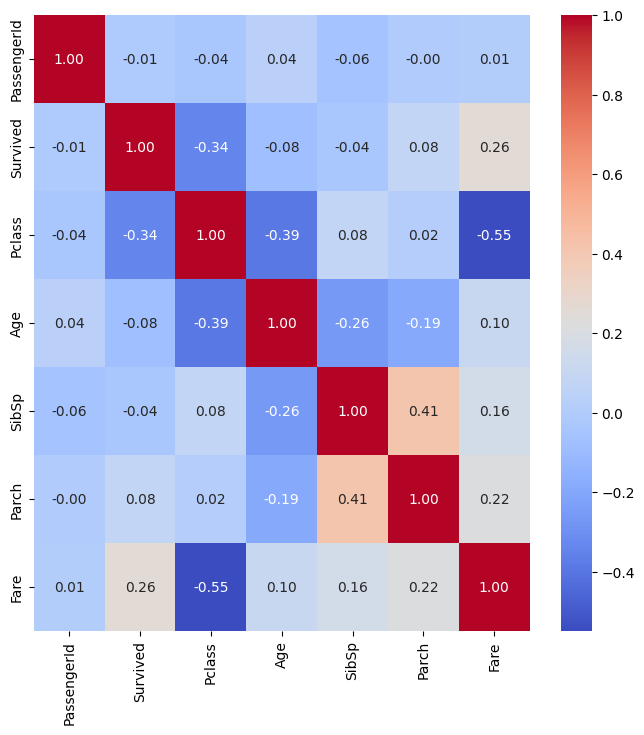

In [62]:
# plot the correlation matrix

num_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 8))
sns.heatmap(num_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [63]:
# # plot the pairplot
# sns.pairplot(num_df)
# plt.show()

In [64]:
# # plot pairplot of survived vs other features
# sns.pairplot(num_df, hue='Survived')
# plt.show()

## 4.Feature Engineering

### 4.1 Feature Construction

In [65]:
# Extract titles using regex
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [66]:
# Normalize titles
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don',
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

print(df['Title'].value_counts())

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [67]:
# create a new column FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# create a new column IsAlone
df['IsAlone'] = df['FamilySize'].apply(lambda x: 0 if x > 1 else 1)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Title  FamilySize  \
0      0         A/5 21171   7.2500  Unknown        S    Mr           2   
1      0          PC 17599  71.2833      C85        C   Mrs           2   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss           1   
3      0            

### 4.2 Feature Encoding

In [68]:
# encode the categorical columns
categorical_columns = ['Sex', 'Embarked', 'Title']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

### 4.3 Feature Selection

In [69]:
# drop the Name, Ticket, and PassengerId columns 
df = df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  IsAlone  \
0         0       3  22.0      1      0   7.2500           2        0   
1         1       1  38.0      1      0  71.2833           2        0   
2         1       3  26.0      0      0   7.9250           1        1   
3         1       1  35.0      1      0  53.1000           2        0   
4         0       3  35.0      0      0   8.0500           1        1   

   Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  \
0      True       False        True       False      True      False   
1     False       False       False       False     False       True   
2     False       False        True        True     False      False   
3     False       False        True       False     False       True   
4      True       False        True       False      True      False   

   Title_Rare  
0       False  
1       False  
2       False  
3       False  
4       False  


### 4.4 Feature Normalization

- Tree-based models aren't dependent on feature distribution or scale, but log transforms or scaling can reduce outlier impact, improve interpretability, and ensure consistency with other models.

In [70]:
# check skewness of age and fare
print(df['Age'].skew())
print(df['Fare'].skew())

0.4284359529159576
4.787316519674893


In [71]:
import numpy as np

# log transform the Fare column
df['Fare'] = df['Fare'].apply(lambda x: np.log1p(x))

# scale the Age and Fare columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(df.head())

   Survived  Pclass       Age  SibSp  Parch      Fare  FamilySize  IsAlone  \
0         0       3 -0.575760      1      0 -0.879741           2        0   
1         1       1  0.611215      1      0  1.361220           2        0   
2         1       3 -0.279017      0      0 -0.798540           1        1   
3         1       1  0.388657      1      0  1.062038           2        0   
4         0       3  0.388657      0      0 -0.784179           1        1   

   Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  \
0      True       False        True       False      True      False   
1     False       False       False       False     False       True   
2     False       False        True        True     False      False   
3     False       False        True       False     False       True   
4      True       False        True       False      True      False   

   Title_Rare  
0       False  
1       False  
2       False  
3       False  
4       False  


### Further exploration
- Interpretation-driven feature engineering could lead to the creation of features such as `AgeBand` and `FareBand`, based on reasonable assumptions.
- Combine existing features to create meaningful new ones, e.g., `Age * Class`, to catch non-linear relationships.
- Keep original features(like sibsp and parch) along with newly created ones(like family size) for now, allowing the model to select the most relevant features.
- `Ticket` may also contain some information after complex processing.

## 5. Data Splitting

In [72]:
from sklearn.model_selection import train_test_split

# split the data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Logistic Regression
- As a base model.

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create the LR model
log_reg = LogisticRegression(max_iter=1000)

# fit the model
log_reg.fit(X_train, y_train)

# make predictions
y_pred_log_reg = log_reg.predict(X_val)

# evaluate the model
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%')

Logistic Regression Accuracy: 82.12%


## 7. Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid_rf = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4, 5, 6]
}

# # use default or selected value for speed
# param_grid_rf = {
#     'n_estimators': [100],
#     'max_depth': [None],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1]
# }

# create the grid search
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)

# fit the grid search
grid_search_rf.fit(X_train, y_train)

# get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f'Best parameters: {best_params_rf}')

# create the Random Forest model with the best parameters
rf_model = RandomForestClassifier(**best_params_rf, random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

# make predictions
y_pred_rf = rf_model.predict(X_val)

# evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 100}
Random Forest Accuracy: 82.12%


## 8. XGBoost

In [75]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# # define the parameter grid for XGBoost
# param_grid_xgb = {
# 	'n_estimators': [50, 75, 100,150,200],
# 	'max_depth': [1, 2, 3, 4, 5, 6, 7],
# 	'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
# 	'subsample': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# }

# use default or selected hyperparameters for speed
param_grid_xgb = {
	'n_estimators': [75],
	'max_depth': [65],
	'learning_rate': [0.2],
	'subsample': [0.5]
}

# create the grid search
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=1)

# fit the grid search
grid_search_xgb.fit(X_train, y_train)

# get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f'Best parameters for XGBoost: {best_params_xgb}')

# create the XGB model with the best parameters
model_XGB = XGBClassifier(**best_params_xgb, random_state=42)

# fit the model
model_XGB.fit(X_train, y_train)

# make predictions
y_pred_xgb = model_XGB.predict(X_val)

# evaluate the model
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 65, 'n_estimators': 75, 'subsample': 0.5}
XGBoost Accuracy: 81.56%


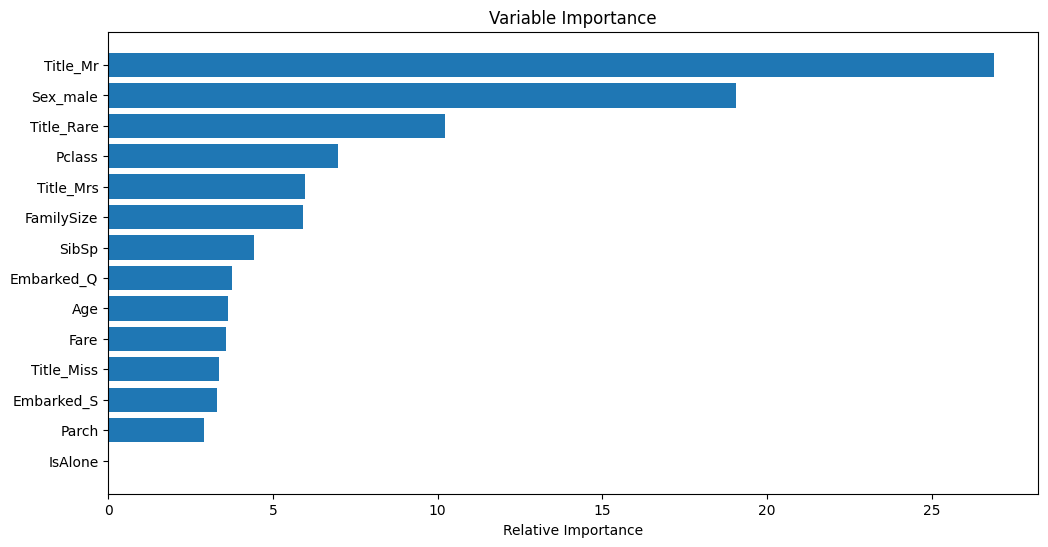

In [76]:
# check the feature importance
feature_importance = model_XGB.feature_importances_ * 100

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## 9. Make prediction

### 9.1 Processing test set

In [77]:
# read test data
# df_test = pd.read_csv('titanic/test.csv')
# #on kaggle
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

df_test['Age'] = df_test['Age'].fillna(
    df_test.groupby(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'])['Age'].transform('mean')
)
df_test['Age'] = df_test['Age'].fillna(
    df_test.groupby(['Pclass', 'Sex'])['Age'].transform('mean')
)
global_mean_age_test = df_test['Age'].mean()
df_test['Age'] = df_test['Age'].fillna(global_mean_age_test)

# Extract and normalize titles
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

df_test['Title'] = df_test['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

print(df_test['Title'].value_counts())

# Fill missing values in the test set
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])
df_test['Cabin'] = df_test['Cabin'].fillna('Unknown')

# Create new features in the test set
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['IsAlone'] = df_test['FamilySize'].apply(lambda x: 0 if x > 1 else 1)

# Encode categorical features in the test set
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Drop unnecessary columns in the test set
df_test = df_test.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

# Log transform the Fare column in the test set
df_test['Fare'] = df_test['Fare'].apply(lambda x: np.log1p(x))

# Scale the Age and Fare columns in the test set
df_test[['Age', 'Fare']] = scaler.transform(df_test[['Age', 'Fare']])

print(df_test.head())

Title
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: count, dtype: int64
   Pclass       Age  SibSp  Parch      Fare  FamilySize  IsAlone  Sex_male  \
0       3  0.351564      0      0 -0.809683           1        1      True   
1       3  1.278888      1      0 -0.911513           2        0     False   
2       2  2.391677      0      0 -0.612461           1        1      True   
3       3 -0.204831      0      0 -0.716562           1        1      True   
4       3 -0.575760      1      1 -0.387631           3        0     False   

   Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0        True       False       False      True      False       False  
1       False        True       False     False       True       False  
2        True       False       False      True      False       False  
3       False        True       False      True      False       False  
4       False        True       False     False       True      

### 9.2 Retrain the model using XGBoost and make prediction

In [78]:
# retrain the model on the entire training set using xgboost
model_XGB.fit(X, y)

# make predictions on the test set
predictions = model_XGB.predict(df_test)

# create a submission file
submission = pd.DataFrame({'PassengerId': pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId'], 'Survived': predictions})

# save the submission file
submission.to_csv('submission.csv', index=False)

# print output message with time
import datetime
current_time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(f'Output generated at: {current_time}.')

Output generated at: 2024-11-25 01:16:33.
